<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/machine_learning_titanic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
# 데이터 로드
from google.colab import drive
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/Titanic/train.csv')

In [4]:
# 전체 행과 열 개수
data.shape

(891, 12)

# 데이터 속성
Passengerld: 탑승객 고유 ID

Survived: 생존 여부(0: 사망, 1: 생존)

Pclass: 객실 등급(1/2/3등급)

Name: 이름

Sex: 성별

Age: 나이

SibSp: 함께 탑승한 형제자매, 배우자 수

Parch: 함께 탑승한 부모, 자식 수 

TicketFare: 객실 번호

CabinEmbarked: 탑승한 영구 위치
(C = Cher bourg, Q = Queenstown, S = Southampton)

In [5]:
# 위에서부터 5개 행
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 아래 5개
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# 결측값 확인

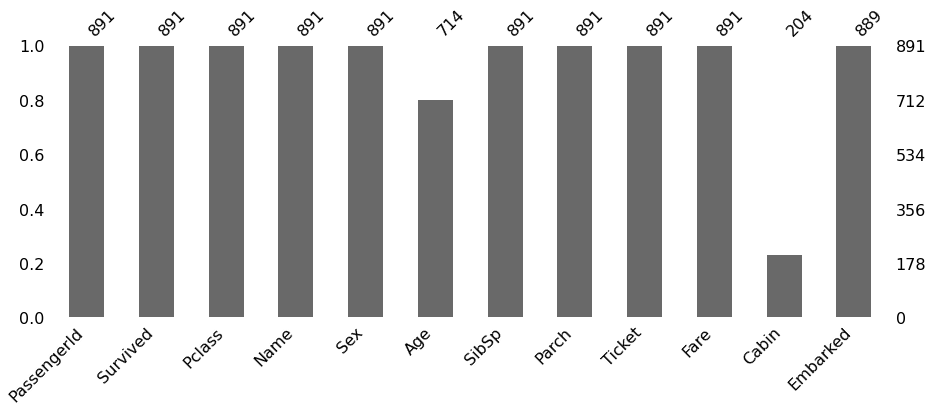

In [7]:
# 생존율을 나타내는 Survived 속성과 다른 속성들 간 관계 확인 전 결측값 확인 필요

import missingno as msno
msno.bar(data, figsize=(15,5))

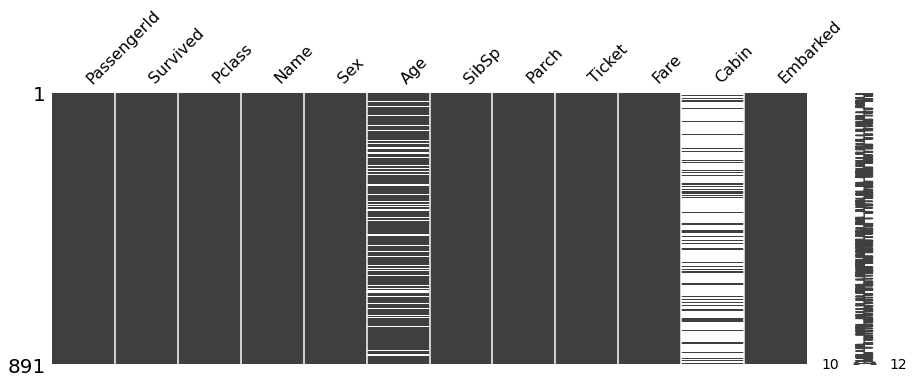

In [8]:
msno.matrix(data, figsize=(15,5))

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


# 데이터 시각화

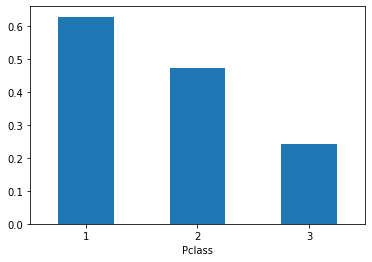

In [11]:
# 객실 등급별 생존율 평균 비교 (막대 그래프)
data.groupby("Pclass").mean()["Survived"].plot(kind="bar", rot=0)

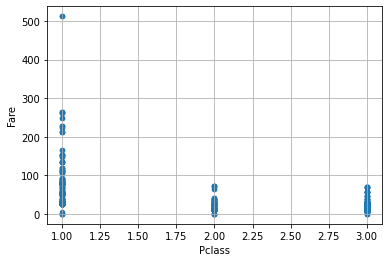

In [12]:
# 객실 등급과 요금과의 관계 시각화 (산점도 그래프)
data.plot(x="Pclass", y="Fare", kind='scatter', grid=True)

In [15]:
# 성별에 대한 여러 속성들의 평군값 비교
data.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


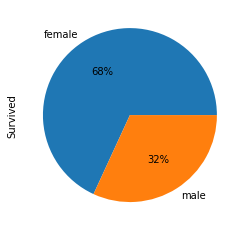

In [18]:
# 성별과 생존율과의 관계 시각화 (원 그래프)
data_s = data[data["Survived"]==1]
data_s.groupby("Sex").count()["Survived"].plot(kind='pie', autopct="%.f%%") # autopct옵션을 이용하면 비율 표시 가능

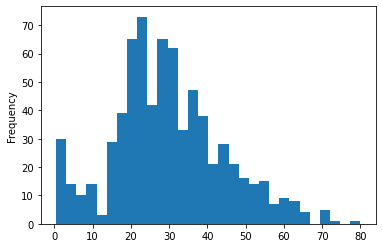

In [25]:
# 승객 연령대별 분포 시각화 (히스토그램)
data['Age'].plot(kind='hist',bins=30) # bin = 막대그래프의 폭

# 20대에서 40대 사이에 사람들이 많이 분포된 것을 볼 수 있다

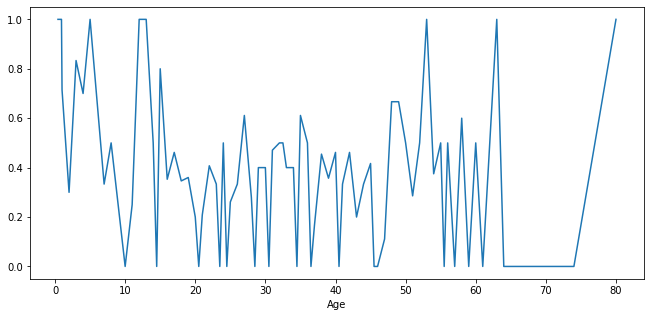

In [27]:
# 나이 속성을 그룹으로 묶어서 평균 계산
# 선 그래프로 시각화
data.groupby("Age").mean()["Survived"].plot(figsize=(11,5)) # figsize=(가로 길이,세로 길이)

# 분석 결과 연령별 분포가 많았던 20대에서 40대 사이는 생존율이 상대적으로 낮음

# 타이태닉 데이터 시각화로 알게 된 사실

### 데이터를 다양한 형태로 *시각화*하면

### -> 데이터 속성들의 *관계*, 기계학습에 사용할 *중요한 속성*을 파악하는 데 유용

[알게 된 사실]

*   객실 등급 1,2,3 순으로 요금 평균이 높았고, 생존률 평균이 높았다
*   여자가 남자보다 생존율이 높았다
*   승객의 평균 연령대는 20~40대가 가장 많았으나 상대적으로 생존율 평균은 낮았다


